In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Coderhouse/Data Science/Primera Entrega/CreditCardClustering.csv",sep=",")
df.sample(7)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5783,C15945,57.657781,0.818182,587.25,0.00,587.25,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,1000.0,779.274805,138.599057,0.857143,12
3629,C13732,4226.818800,1.000000,0.00,0.00,0.00,3425.647464,0.000000,0.000000,0.000000,0.416667,8,0,7000.0,1226.710941,1281.843775,0.000000,12
6368,C16543,1134.988498,1.000000,935.04,540.81,394.23,996.543937,0.916667,0.500000,0.750000,0.500000,15,20,4000.0,298.878026,235.549018,0.000000,12
8302,C18523,1973.025342,1.000000,0.00,0.00,0.00,2009.582123,0.000000,0.000000,0.000000,0.666667,6,0,2000.0,325.367575,476.302544,0.000000,9
5316,C15467,1543.205532,1.000000,1027.57,927.57,100.00,0.000000,0.416667,0.333333,0.083333,0.000000,0,13,6000.0,319.878647,443.406361,0.000000,12
6133,C16304,778.393346,1.000000,1854.30,174.40,1679.90,0.000000,1.000000,0.083333,1.000000,0.000000,0,26,1200.0,844.459124,717.606248,0.166667,12
6029,C16199,2481.696036,1.000000,1326.09,1326.09,0.00,2033.191162,0.583333,0.583333,0.000000,0.166667,8,15,3500.0,1491.960053,751.452457,0.000000,12


In [4]:

nuevos_nombres = {
    'CUST_ID': 'ID_TITULAR',
    'BALANCE': 'SALDO',
    'BALANCE_FREQUENCY': 'FREC_ACT_SALDO',
    'PURCHASES': 'MONTO_COMPRAS',
    'ONEOFF_PURCHASES': 'MONTO_COMPRA_UNA_SOLAVEZ',
    'INSTALLMENTS_PURCHASES': 'MONTO_COMPRAS_EN_CUOTAS',
    'CASH_ADVANCE': 'ADELANTO_EFECTIVO',
    'PURCHASES_FREQUENCY': 'FRECUENCIA_COMPRAS',
    'ONEOFF_PURCHASES_FREQUENCY': 'FRECUENCIA_COMPRAS_UNA_SOLAVEZ',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'FRECUENCIA_COMPRAS_EN_CUOTAS',
    'CASH_ADVANCE_FREQUENCY': 'FRECUENCIA_ADELANTO_EFECTIVO',
    'CASH_ADVANCE_TRX': 'TRX_ADELANTO_EFECTIVO',
    'PURCHASES_TRX': 'TRX_COMPRAS',
    'CREDIT_LIMIT': 'LIMITE_CREDITO',
    'PAYMENTS': 'PAGOS',
    'MINIMUM_PAYMENTS': 'PAGOS_MINIMOS',
    'PRCFULLPAYMENT': 'PORCENTAJE_PAGO_COMPLETO',
    'TENURE': 'TENURE'
}


# Usamos el método rename para cambiar los nombres de las columnas
df.rename(columns=nuevos_nombres, inplace=True)

# Ahora tu DataFrame 'df' tendrá los nombres de columnas actualizados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_TITULAR                      8950 non-null   object 
 1   SALDO                           8950 non-null   float64
 2   FREC_ACT_SALDO                  8950 non-null   float64
 3   MONTO_COMPRAS                   8950 non-null   float64
 4   MONTO_COMPRA_UNA_SOLAVEZ        8950 non-null   float64
 5   MONTO_COMPRAS_EN_CUOTAS         8950 non-null   float64
 6   ADELANTO_EFECTIVO               8950 non-null   float64
 7   FRECUENCIA_COMPRAS              8950 non-null   float64
 8   FRECUENCIA_COMPRAS_UNA_SOLAVEZ  8950 non-null   float64
 9   FRECUENCIA_COMPRAS_EN_CUOTAS    8950 non-null   float64
 10  FRECUENCIA_ADELANTO_EFECTIVO    8950 non-null   float64
 11  TRX_ADELANTO_EFECTIVO           8950 non-null   int64  
 12  TRX_COMPRAS                     89

#Contexto Comercial, problema comercial y contexto análitico

**Contexto Comercial**

Un gerente general quiere saber como se agrupan los clientes con caracteristicas similares con el fin de elaborar estrategis de retención o insertar nuevos productos financieros o mejorar los productos que esten.

**Problema Comercial**

Para elaborar las estrategias tienen que realizar como se agrupan toda la cartera de clientes es necesario realizar técnicas de machine learning no supervisado y ver como se agrupan los clientes con caracteristicas similares y según eso realizar las estartegias.

**Contexto análitico**

Para poder desarrollar el modelo se cuenta con ña siguiente información:

ID_TITULAR: Identificación del Titular de Tarjeta de Crédito (Categórica)

SALDO: Saldo Disponible para Compras

FREC_ACT_SALDO: Frecuencia de Actualización de Saldo (Puntuación entre 0 y 1)

MONTO_COMPRAS: Monto de Compras Realizadas

MONTO_COMPRA_UNA_SOLA_VEZ: Monto Máximo de Compra en un Solo Pago

MONTO_COMPRAS_EN_CUOTAS: Monto de Compras en Cuotas

ADELANTO_EFECTIVO: Efectivo Adelantado Otorgado por el Usuario

FRECUENCIA_COMPRAS: Frecuencia de Compras (Puntuación entre 0 y 1)

FRECUENCIA_COMPRAS_UNA_SOLA_VEZ: Frecuencia de Compras en un Solo Pago (Puntuación entre 0 y 1)

FRECUENCIA_COMPRAS_EN_CUOTAS: Frecuencia de Compras en Cuotas (Puntuación entre 0 y 1)

FRECUENCIA_ADELANTO_EFECTIVO: Frecuencia de Pagos de Efectivo Adelantado

TRX_ADELANTO_EFECTIVO: Número de Transacciones con "Efectivo Adelantado"

TRX_COMPRAS: Número de Transacciones de Compra

LIMITE_CREDITO: Límite de Crédito de la Tarjeta

PAGOS: Monto de Pagos Realizados por el Usuario

PAGOS_MINIMOS: Monto Mínimo de Pagos Realizados por el Usuario

PORCENTAJE_PAGO_COMPLETO: Porcentaje de Pago Completo Realizado por el Usuario

TENURE: Duración del Servicio de Tarjeta de Crédito para el Usuario

#**Abstracto,motivación y audiencia:**

**Abastracto**

En este proyecto analizaremos la base de datos que cuentan con la información de los usuarios, movimientos financieros del uso de la TC, todo con lo que conlleva el comportamiento financiero de los usuarios con su tarjeta de crédito.

**Motivación**

Buscar patrones de comportamiento de los clientes, segmentarlos según sus habitos de compra y pago, para así poder mejorar las estrategias de retención de clientes y las ofertas de productos financieros.

**Audiencia**

Equipo de estrategia de marketing y el area de finanzas de una empresa de banco.

#**Preguntas**

**¿Cuál es el promedio de Saldo de los usuarios?**

En este caso los clientes tienen en promedio $863 aprox.

**¿Cuál es el limite del promedio de crédito?**

El limite promedio del saldo de los clientes, rondan alrededor de los $3000

**¿Que porcentaje de los clientes han utilizado Efectivo por adelantado?**

Cerca del 60% no han utilizado ninguna vez el efectivo por adelantado, por ende, el 40% restante ha utilizado al menos una vez este producto  financiero.

**¿Cuál es la frecuencia promedio de compras en un solo pago versus la frecunecia de compras a cuotas?**

La frecuencia promedio de compras de una sola vez es 0.20 y en cuotas es 0.36, esto quiere decir que en promedio los clientes tienen mayor preferencia a realizar sus compras en cuotas que en un solo pago.

**¿Existen segmentos de clientes con patrones de comportamiento distintos?**

Tras un pequeño análisis univariado, observamos que hay

#**Hipotesis**

* Los clientes con un saldo más alto tienden a realizar más compras en un solo pago que en cuotas.

* Los clientes que utilizan más frecuentemente los anticipos de efectivo tienden a tener un mayor porcentaje de saldo sin pagar.

* Aquellos con un límite de crédito más alto tienen una menor frecuencia de uso de anticipos de efectivo.

#**Análisis Exploratorio de Datos(EDA)**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SALDO,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
FREC_ACT_SALDO,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
MONTO_COMPRAS,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
MONTO_COMPRA_UNA_SOLAVEZ,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
MONTO_COMPRAS_EN_CUOTAS,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
ADELANTO_EFECTIVO,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
FRECUENCIA_COMPRAS,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
FRECUENCIA_COMPRAS_UNA_SOLAVEZ,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
FRECUENCIA_COMPRAS_EN_CUOTAS,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
FRECUENCIA_ADELANTO_EFECTIVO,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
df.isnull().mean()

ID_TITULAR                        0.000000
SALDO                             0.000000
FREC_ACT_SALDO                    0.000000
MONTO_COMPRAS                     0.000000
MONTO_COMPRA_UNA_SOLAVEZ          0.000000
MONTO_COMPRAS_EN_CUOTAS           0.000000
ADELANTO_EFECTIVO                 0.000000
FRECUENCIA_COMPRAS                0.000000
FRECUENCIA_COMPRAS_UNA_SOLAVEZ    0.000000
FRECUENCIA_COMPRAS_EN_CUOTAS      0.000000
FRECUENCIA_ADELANTO_EFECTIVO      0.000000
TRX_ADELANTO_EFECTIVO             0.000000
TRX_COMPRAS                       0.000000
LIMITE_CREDITO                    0.000112
PAGOS                             0.000000
PAGOS_MINIMOS                     0.034972
PRC_FULL_PAYMENT                  0.000000
TENURE                            0.000000
dtype: float64

**Tratar los nulos**

In [8]:
df["LIMITE_CREDITO"].fillna(df["LIMITE_CREDITO"].median(),inplace=True)
df["PAGOS_MINIMOS"].fillna(df["PAGOS_MINIMOS"].median(),inplace=True)

In [9]:
df.isnull().mean()

ID_TITULAR                        0.0
SALDO                             0.0
FREC_ACT_SALDO                    0.0
MONTO_COMPRAS                     0.0
MONTO_COMPRA_UNA_SOLAVEZ          0.0
MONTO_COMPRAS_EN_CUOTAS           0.0
ADELANTO_EFECTIVO                 0.0
FRECUENCIA_COMPRAS                0.0
FRECUENCIA_COMPRAS_UNA_SOLAVEZ    0.0
FRECUENCIA_COMPRAS_EN_CUOTAS      0.0
FRECUENCIA_ADELANTO_EFECTIVO      0.0
TRX_ADELANTO_EFECTIVO             0.0
TRX_COMPRAS                       0.0
LIMITE_CREDITO                    0.0
PAGOS                             0.0
PAGOS_MINIMOS                     0.0
PRC_FULL_PAYMENT                  0.0
TENURE                            0.0
dtype: float64

**Análisis Univariado**

In [10]:
df_S = df[df["SALDO"]<10000]

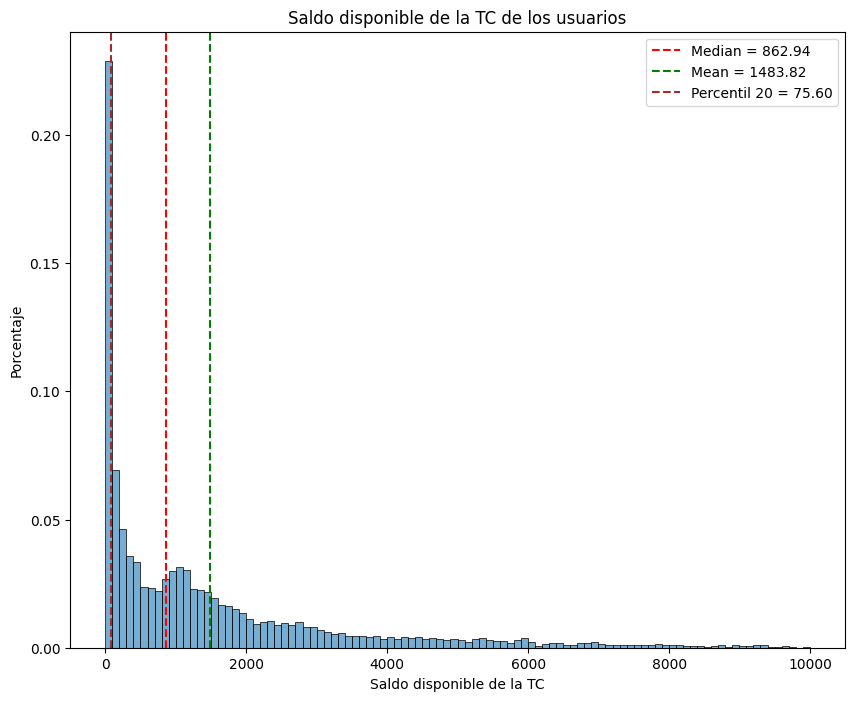

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_S,
             x="SALDO",
             alpha=0.6,
             bins=100,
             stat="probability")
plt.xlabel("Saldo disponible de la TC")
plt.ylabel("Porcentaje")
plt.title("Saldo disponible de la TC de los usuarios")
#Calculamos la media y mediana y percentil
median_PRC = df_S["SALDO"].median()
mean_PRC = df_S["SALDO"].mean()
per_20 = df_S["SALDO"].quantile(0.2)

#Trazos y legenda
plt.axvline(median_PRC,color="red",linestyle="dashed",label=f'Median = {median_PRC:.2f}')
plt.axvline(mean_PRC,color="green",linestyle="dashed",label=f'Mean = {mean_PRC:.2f}')
plt.axvline(per_20,color="brown",linestyle="dashed",label=f'Percentil 20 = {per_20:.2f}')
plt.legend()

Contestando a una de las preguntas de ¿Cuál es el promedio de Saldo de los usuarios?

En este caso los clientes tienen en promedio $863 aprox.

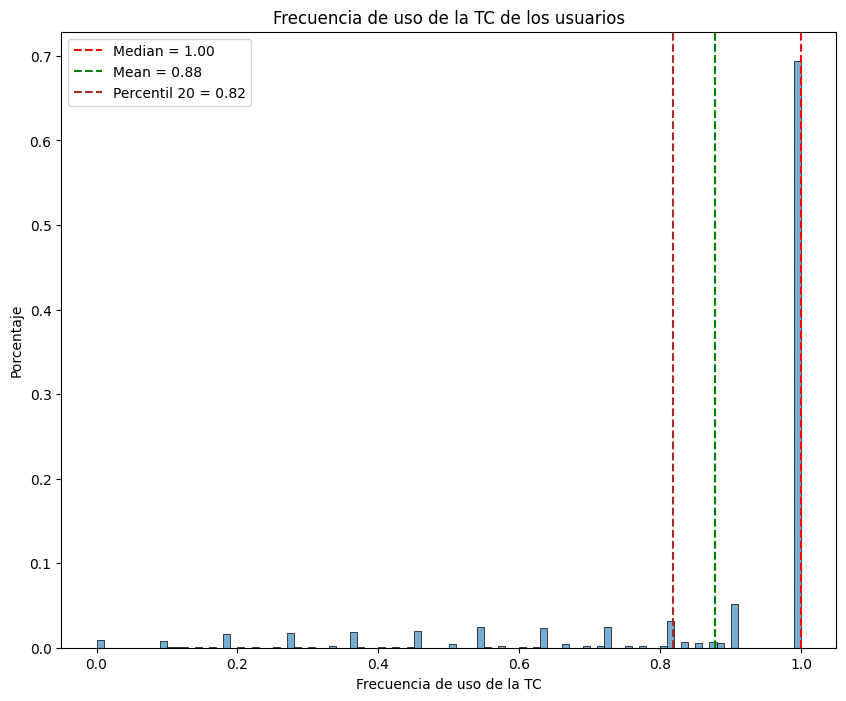

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,
             x="FREC_ACT_SALDO",
             alpha=0.6,
             bins=100,
             stat="probability")
plt.xlabel("Frecuencia de uso de la TC")
plt.ylabel("Porcentaje")
plt.title("Frecuencia de uso de la TC de los usuarios")
#Calculamos la media y mediana y percentil
median_PRC = df["FREC_ACT_SALDO"].median()
mean_PRC = df["FREC_ACT_SALDO"].mean()
per_20 = df["FREC_ACT_SALDO"].quantile(0.2)

#Trazos y legenda
plt.axvline(median_PRC,color="red",linestyle="dashed",label=f'Median = {median_PRC:.2f}')
plt.axvline(mean_PRC,color="green",linestyle="dashed",label=f'Mean = {mean_PRC:.2f}')
plt.axvline(per_20,color="brown",linestyle="dashed",label=f'Percentil 20 = {per_20:.2f}')
plt.legend()

In [13]:
df_M=df[df["MONTO_COMPRAS"]<8000]

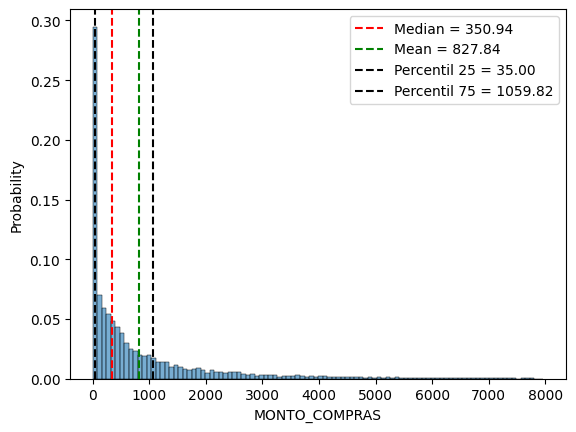

In [14]:
plt.figure()
sns.histplot(data=df_M,x="MONTO_COMPRAS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_M["MONTO_COMPRAS"].median()
mn= df_M["MONTO_COMPRAS"].mean()
p25= df_M["MONTO_COMPRAS"].quantile(0.25)
p75=df_M["MONTO_COMPRAS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [15]:
df_MV = df[df["MONTO_COMPRA_UNA_SOLAVEZ"]<2000]

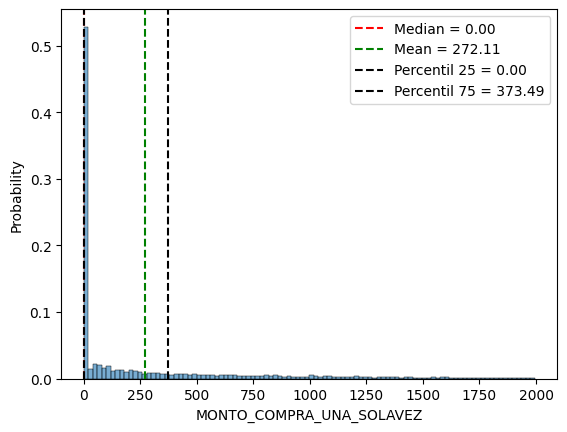

In [16]:
plt.figure()
sns.histplot(data=df_MV,x="MONTO_COMPRA_UNA_SOLAVEZ",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_MV["MONTO_COMPRA_UNA_SOLAVEZ"].median()
mn= df_MV["MONTO_COMPRA_UNA_SOLAVEZ"].mean()
p25= df_MV["MONTO_COMPRA_UNA_SOLAVEZ"].quantile(0.25)
p75=df_MV["MONTO_COMPRA_UNA_SOLAVEZ"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [17]:
df_MVC = df[df["MONTO_COMPRAS_EN_CUOTAS"]<=2000]

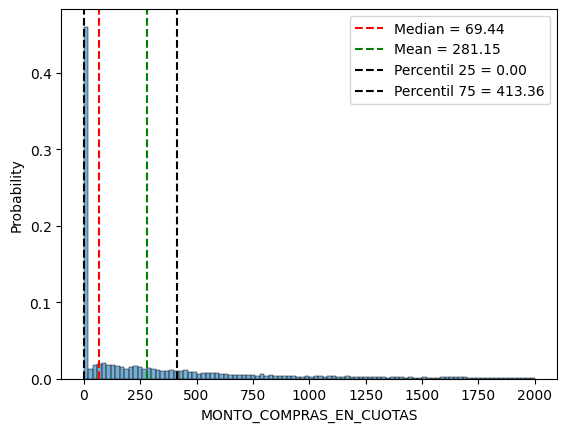

In [18]:
plt.figure()
sns.histplot(data=df_MVC,x="MONTO_COMPRAS_EN_CUOTAS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_MVC["MONTO_COMPRAS_EN_CUOTAS"].median()
mn= df_MVC["MONTO_COMPRAS_EN_CUOTAS"].mean()
p25= df_MVC["MONTO_COMPRAS_EN_CUOTAS"].quantile(0.25)
p75=df_MVC["MONTO_COMPRAS_EN_CUOTAS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [19]:
df_e = df[df["ADELANTO_EFECTIVO"]<=1000]

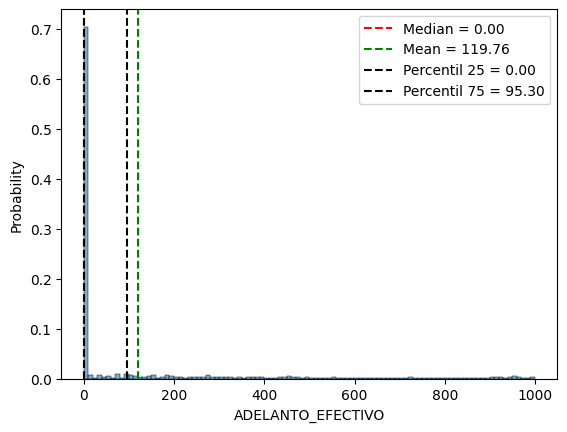

In [20]:
plt.figure()
sns.histplot(data=df_e,x="ADELANTO_EFECTIVO",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_e["ADELANTO_EFECTIVO"].median()
mn= df_e["ADELANTO_EFECTIVO"].mean()
p25= df_e["ADELANTO_EFECTIVO"].quantile(0.25)
p75=df_e["ADELANTO_EFECTIVO"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

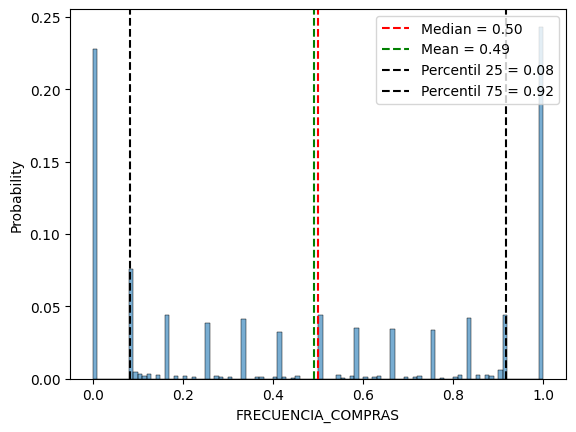

In [21]:
plt.figure()
sns.histplot(data=df,x="FRECUENCIA_COMPRAS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df["FRECUENCIA_COMPRAS"].median()
mn= df["FRECUENCIA_COMPRAS"].mean()
p25= df["FRECUENCIA_COMPRAS"].quantile(0.25)
p75=df["FRECUENCIA_COMPRAS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

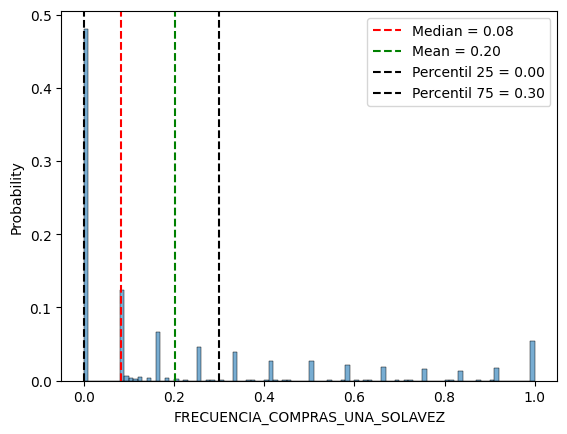

In [22]:
plt.figure()
sns.histplot(data=df,x="FRECUENCIA_COMPRAS_UNA_SOLAVEZ",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df["FRECUENCIA_COMPRAS_UNA_SOLAVEZ"].median()
mn= df["FRECUENCIA_COMPRAS_UNA_SOLAVEZ"].mean()
p25= df["FRECUENCIA_COMPRAS_UNA_SOLAVEZ"].quantile(0.25)
p75=df["FRECUENCIA_COMPRAS_UNA_SOLAVEZ"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

La frecuencia promedio de compras de una sola vez es 0.20 y en cuotas es 0.36, esto quiere decir que en promedio los clientes tienen mayor preferencia a realizar sus compras en cuotas que en un solo pago.

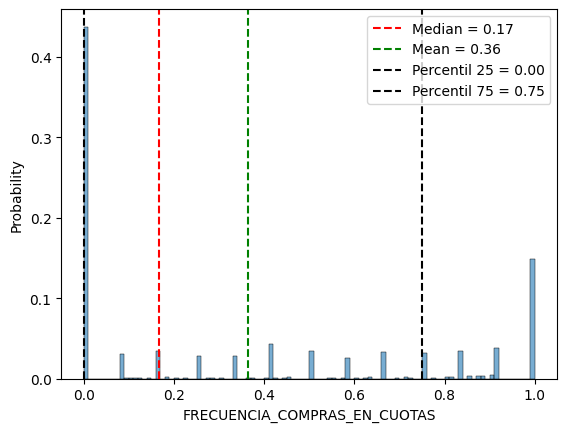

In [23]:
plt.figure()
sns.histplot(data=df,x="FRECUENCIA_COMPRAS_EN_CUOTAS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df["FRECUENCIA_COMPRAS_EN_CUOTAS"].median()
mn= df["FRECUENCIA_COMPRAS_EN_CUOTAS"].mean()
p25= df["FRECUENCIA_COMPRAS_EN_CUOTAS"].quantile(0.25)
p75=df["FRECUENCIA_COMPRAS_EN_CUOTAS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

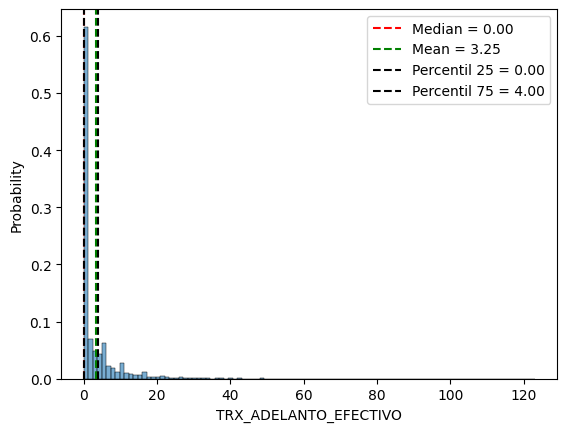

In [24]:
plt.figure()
sns.histplot(data=df,x="TRX_ADELANTO_EFECTIVO",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df["TRX_ADELANTO_EFECTIVO"].median()
mn= df["TRX_ADELANTO_EFECTIVO"].mean()
p25= df["TRX_ADELANTO_EFECTIVO"].quantile(0.25)
p75=df["TRX_ADELANTO_EFECTIVO"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

Cerca del 60% no han utilizado ninguna vez el efectivo por adelantado, por ende, el 40% restante ha utilizado al menos una vez este producto  financiero.

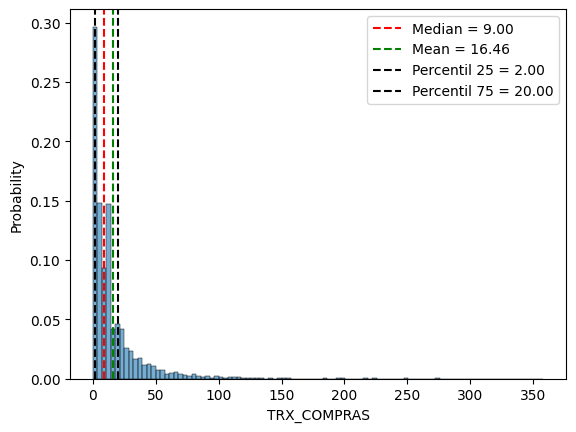

In [25]:
plt.figure()
sns.histplot(data=df_e,x="TRX_COMPRAS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_e["TRX_COMPRAS"].median()
mn= df_e["TRX_COMPRAS"].mean()
p25= df_e["TRX_COMPRAS"].quantile(0.25)
p75=df_e["TRX_COMPRAS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

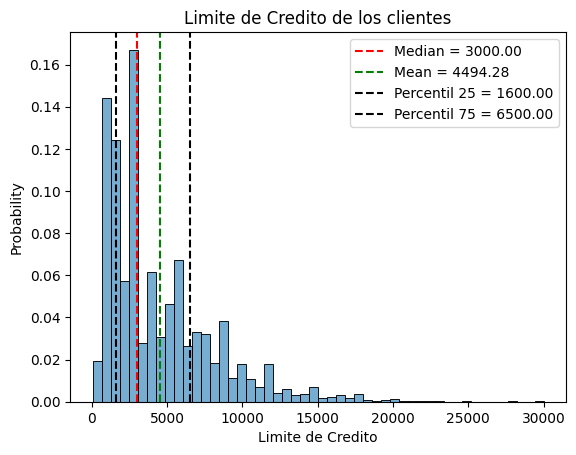

In [26]:
plt.figure()
sns.histplot(data=df,x="LIMITE_CREDITO",
             alpha=0.6,
             stat="probability",
             bins=50)
plt.xlabel("Limite de Credito")
plt.title("Limite de Credito de los clientes")
#Calculamos la mediana, media,percentil 25 y 75
md=df["LIMITE_CREDITO"].median()
mn=df["LIMITE_CREDITO"].mean()
p25=df["LIMITE_CREDITO"].quantile(0.25)
p75=df["LIMITE_CREDITO"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

**El limite promedio del saldo de los clientes, rondan alrededor de los $3000**

In [27]:
df_P=df[df["PAGOS"]<8000]

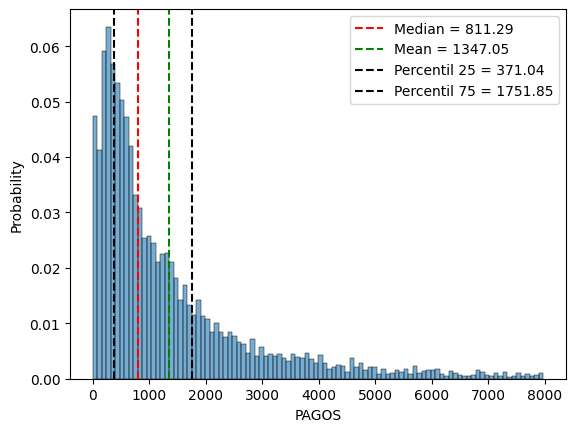

In [28]:
plt.figure()
sns.histplot(data=df_P,x="PAGOS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_P["PAGOS"].median()
mn= df_P["PAGOS"].mean()
p25= df_P["PAGOS"].quantile(0.25)
p75=df_P["PAGOS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [29]:
df_PG=df[df["PAGOS_MINIMOS"]<8000]

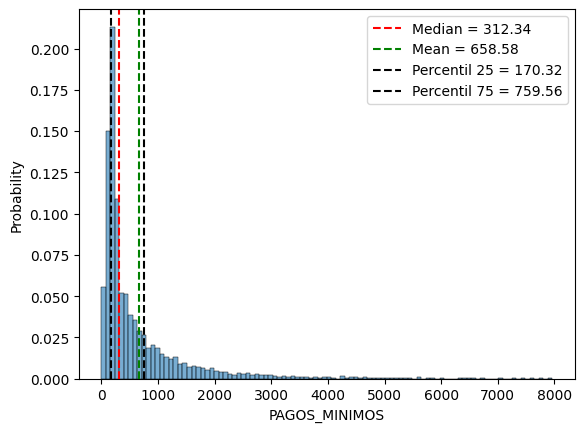

In [30]:
plt.figure()
sns.histplot(data=df_PG,x="PAGOS_MINIMOS",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df_PG["PAGOS_MINIMOS"].median()
mn= df_PG["PAGOS_MINIMOS"].mean()
p25= df_PG["PAGOS_MINIMOS"].quantile(0.25)
p75=df_PG["PAGOS_MINIMOS"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

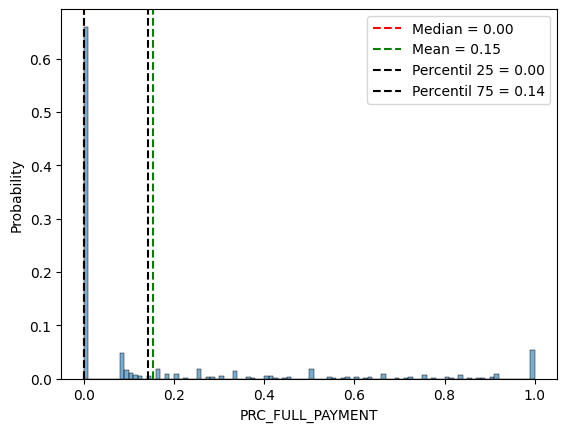

In [31]:
plt.figure()
sns.histplot(data=df,x="PRC_FULL_PAYMENT",
             alpha = 0.6,
             stat="probability",
             bins=100)
#Calcular media,mean y per25 y per75
md= df["PRC_FULL_PAYMENT"].median()
mn= df["PRC_FULL_PAYMENT"].mean()
p25= df["PRC_FULL_PAYMENT"].quantile(0.25)
p75=df["PRC_FULL_PAYMENT"].quantile(0.75)
#Trazos y legenda
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

#**Análisis bivariado**

<Axes: xlabel='FRECUENCIA_COMPRAS_EN_CUOTAS', ylabel='SALDO'>

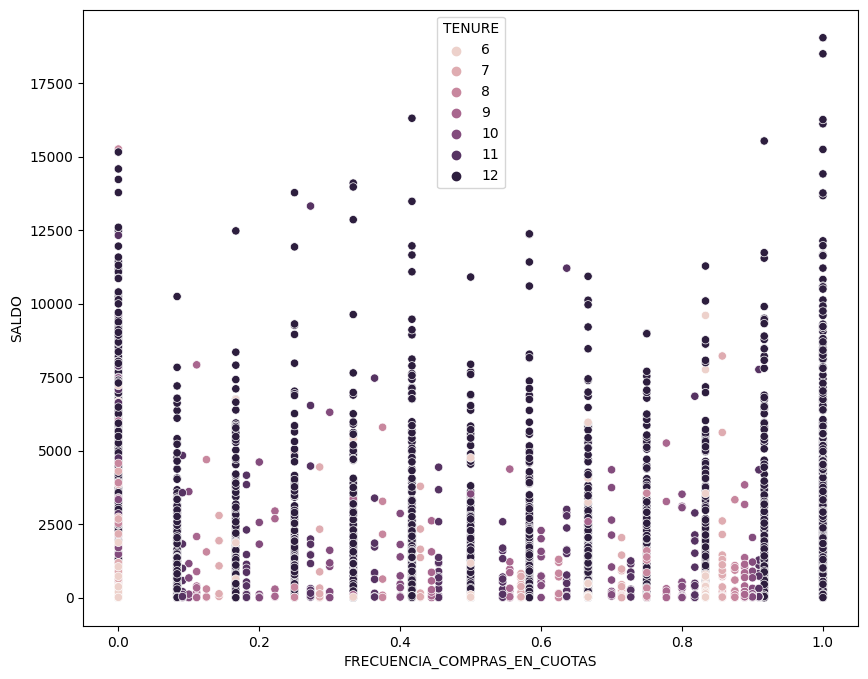

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df,
            x="FRECUENCIA_COMPRAS_EN_CUOTAS",
                y="SALDO",
                hue="TENURE")

Se puede observar que no necesariamente los clientes con mayores saldos tienden a comprar en cuotas, pero si lo que se observa es que los clientes mas antiguos tienden a comprar más en cuotas que los que son más nuevos.

**Se van a transformar la variable FRECUENCIA_ADELANTO_EFECTIVO**

In [33]:
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ["Baja", "Media", "Alta", "Muy alta"]
df["Categoria_Adelanto"] = pd.cut(df["FRECUENCIA_ADELANTO_EFECTIVO"], bins=bins, labels=labels, include_lowest=True)


<Axes: xlabel='Categoria_Adelanto', ylabel='PRC_FULL_PAYMENT'>

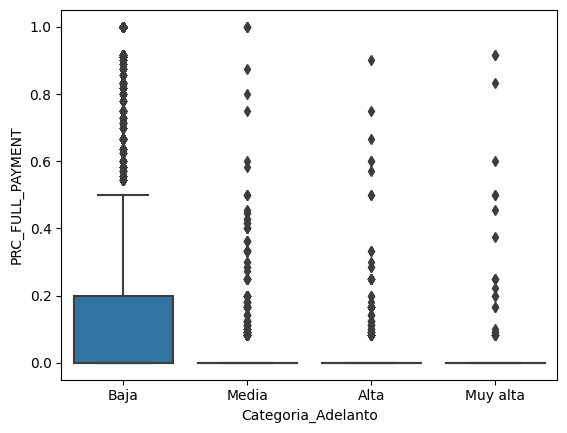

In [34]:
plt.figure()
sns.boxplot(data=df,
            x="Categoria_Adelanto",
            y="PRC_FULL_PAYMENT")

**Como se observa las personas que usan menos el efectivo por adelantado, tienen un mejor comportamiento frente a sus obligaciones financieras**

**Transformacion de PRC_Full_Payment**

In [35]:
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ["Baja", "Media", "Alta", "Muy alta"]
df["PRC_Cat"] = pd.cut(df["PRC_FULL_PAYMENT"], bins=bins, labels=labels, include_lowest=True)

<Axes: xlabel='PRC_Cat', ylabel='LIMITE_CREDITO'>

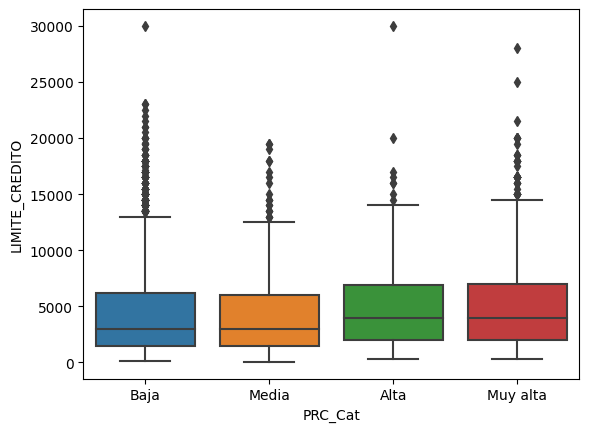

In [36]:
plt.figure()
sns.boxplot(data=df,
            x="PRC_Cat",
            y="LIMITE_CREDITO")

Se puede observar que hay una pequeña tendencia que en la cual los que tienen limites de créditos más altos tienden a tener un mejor comportamiento frente a sus obligaciones financieras.

**Adelanto Efectivo vs PRC**

<Axes: xlabel='Categoria_Adelanto', ylabel='LIMITE_CREDITO'>

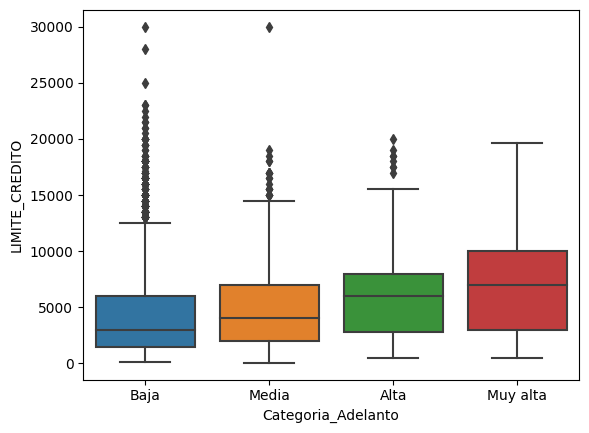

In [37]:
plt.figure()
sns.boxplot(data=df,
            x="Categoria_Adelanto",
            y="LIMITE_CREDITO")

**En este gráfico se puede apreciar mejor que los que tienen un limite de crédito más alto tienden a usar más el uso de adelanto de efectivo**

# Ingenieria de features

**Creación de variables**

**Uso_Credito** esta variable lo que representa es cuanto es el porcentaje que gasta el cliente su linea de credito, existe algunos casos que sobrepasan el 1 es decir 100%, esto se debe a que el consumidor tuvo que recargar saldo para aumentar el limite de crédito, este podría ser un indicador para que el banco pueda enfocar aquellos clientes que necesiten un aumento de su linea de crédito.

In [38]:
df["Uso_Credito"] = (df["SALDO"]/df["LIMITE_CREDITO"])

In [39]:
df["Uso_Credito"].sort_values(ascending=False).reset_index(drop=True)

0       15.909951
1        2.325422
2        2.033580
3        1.718886
4        1.570210
          ...    
8945     0.000000
8946     0.000000
8947     0.000000
8948     0.000000
8949     0.000000
Name: Uso_Credito, Length: 8950, dtype: float64

In [40]:
df_UC=df[df["Uso_Credito"]<3]

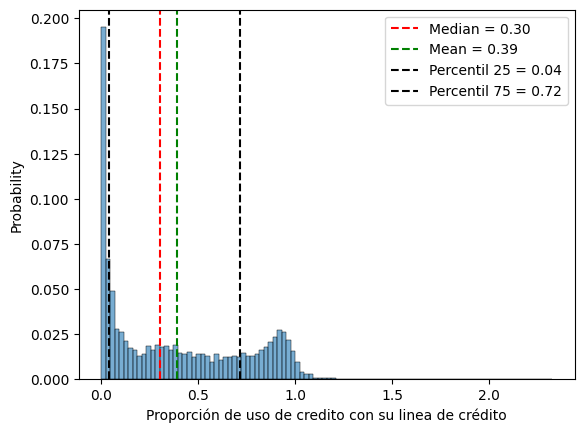

In [41]:
plt.figure()
sns.histplot(data=df_UC, x="Uso_Credito",
             bins=100,
             stat= "probability",
             alpha=0.6)
plt.xlabel("Proporción de uso de credito con su linea de crédito")
#Calculos
md=df["Uso_Credito"].median()
mn=df["Uso_Credito"].mean()
p25=df["Uso_Credito"].quantile(0.25)
p75=df["Uso_Credito"].quantile(0.75)
#Trazos
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [42]:
porcentaje = (len(df[df["Uso_Credito"] > 1]) / len(df)) * 100
porcentaje

2.536312849162011

Como se puede apreciar casi un 98% de los clientes no logran gastar por completo su linea de crédito por ende si estaria bien fijado su linea de crédito, por otro lado, hay un 2.5 % en la cual su linea de crédito es menor a lo que consume, es aquellos individuos que se tiene que analizarlo y como se siguen comportando meses o periodos posteriores para aumentar su linea de crédito si o no.

<Axes: xlabel='TENURE', ylabel='Uso_Credito'>

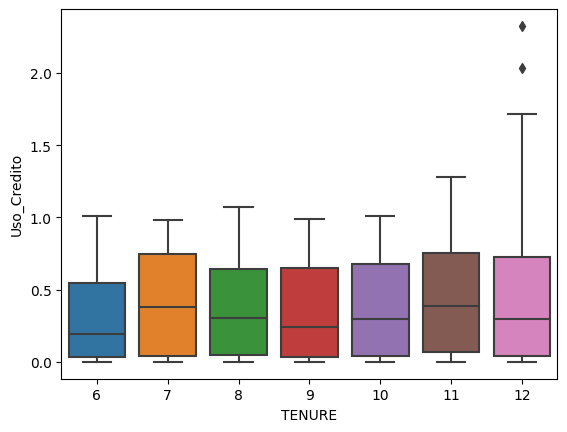

In [43]:
plt.figure()
sns.boxplot(data=df_UC,
            x="TENURE",
            y="Uso_Credito"
            )


Se observa que el cliente tuviera como una curva de aprendizaje de como utilizar una T.C, ya que tiene altibajos, con el pasar de los meses adquiere más experiencia y tiende a consumir cada vez más su limite de crédito, es por ello que los candidatos a un incremento de linea de crédito son los que tienen 11 meses y más, ya que son los más experimentados en el uso de esta herramienta financiera.

**Ratio de Compras en Cuotas**

Este ratio muestra la preferencia que tiene el cliente en comprar en cuotas o no, esto puede indicar la preferencia del cliente por distribuir sus pagos a lo largo del tiempo

In [44]:
df["Rat_Compra_Cuota"] = (df["MONTO_COMPRAS_EN_CUOTAS"]/df["MONTO_COMPRAS"])

In [45]:
df["Rat_Compra_Cuota"].sort_values(ascending=False).reset_index(drop=True)

0            inf
1            inf
2       2.963815
3       2.068023
4       1.716463
          ...   
8945         NaN
8946         NaN
8947         NaN
8948         NaN
8949         NaN
Name: Rat_Compra_Cuota, Length: 8950, dtype: float64

Como se observa nos dan respuestas como NaN e inf esto se debe a que en el caso de inf el MONTO_COMPRAS es 0 por ende una división entre cero da infinito, en cambio el NaN es 0/0, para estas respuestas se tendrá que imputar los valores.

**Imputación de NaN**

In [46]:
df["Rat_Compra_Cuota"] = np.where(df["MONTO_COMPRAS"]==0,0,df["MONTO_COMPRAS_EN_CUOTAS"]/df["MONTO_COMPRAS"])

In [47]:
df["Rat_Compra_Cuota"].isnull().mean()

0.0

**Remplazo de inf**

En este caso los inf no tendrían mucha coherencia tener monto compras en cuotas un valor diferente de cero y monto compras sea 0 es ilógico porque la variable MONTO_COMPRAS es el agregado de todas las compras independientemente que sea cuotas o no, por ende, debe de ser un error de datos así que se reemplaza por un 0

In [48]:
df["Rat_Compra_Cuota"].replace([np.inf], 0, inplace=True)

In [49]:
df["Rat_Compra_Cuota"].sort_values(ascending=False).reset_index(drop=True)

0       2.963815
1       2.068023
2       1.716463
3       1.533255
4       1.529412
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.000000
8949    0.000000
Name: Rat_Compra_Cuota, Length: 8950, dtype: float64

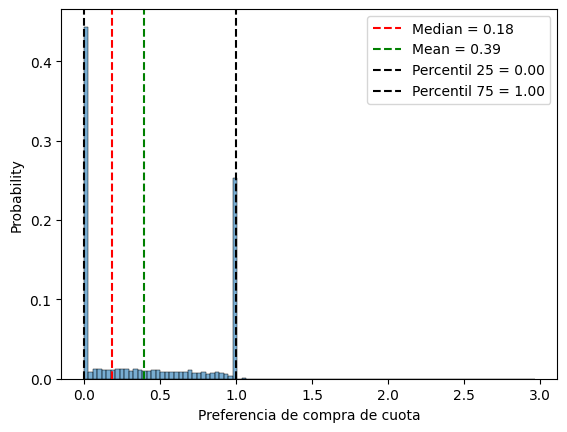

In [50]:
plt.figure()
sns.histplot(data=df, x="Rat_Compra_Cuota",
             bins=100,
             stat= "probability",
             alpha=0.6)
plt.xlabel("Preferencia de compra de cuota")
#Calculos
md=df["Rat_Compra_Cuota"].median()
mn=df["Rat_Compra_Cuota"].mean()
p25=df["Rat_Compra_Cuota"].quantile(0.25)
p75=df["Rat_Compra_Cuota"].quantile(0.75)
#Trazos
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

se puede observar que más del 40% tienen preferencias a comprar directo o 0 cuotas, por otro lado un gran grupo que representa el 25% suele comprar siempre a cuotas. Entonces si el banco quiere optar por que aumente más las compras en cuotas de ciertos clientes tiene que realizar campañas de compras a 6 cuotas con cero de intereses en tiendas que tengan alianza comercial,para que asi tengan un habito de comprar a cuotas y se generen ganancias al banco.

<Axes: xlabel='TENURE', ylabel='Rat_Compra_Cuota'>

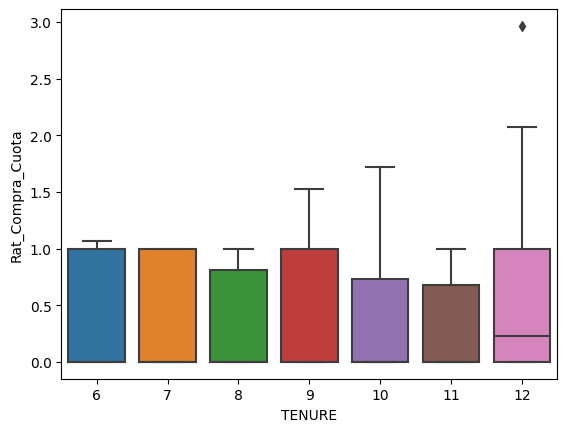

In [51]:
plt.figure()
sns.boxplot(data=df,
            x="TENURE",y = "Rat_Compra_Cuota")

**Ratio de Pagos Minimos**

En este indicador nos señala la proporcion que tiene los pagos mínimos con los pagos totales, es decir, si el indicador es 1 o menos quiere decir que el cliente tiene problemas de solvencia que no logra cubrir el pago minimo si es menor a 1, pero si es 1 es que puede cubrir solamente el gasto de pago minimo, por ende,en ambos casos se tendría que mapearlos para una reducción del limite de crédito y aplicar planes de contigencia de posible no pagadores.

Por otro lado, si el ratio es mayor a 1 es porque el cliente paga más que el pago minimo y esto es sintoma de tener una buena salud financiera.

In [52]:
df["Rat_PM"] = (df["PAGOS"]/df["PAGOS_MINIMOS"])

In [53]:
df["Rat_PM"].sort_values(ascending=False).reset_index(drop=True)

0       6840.528861
1       5367.043208
2       4707.141559
3       2846.533661
4       2470.504187
           ...     
8945       0.000000
8946       0.000000
8947       0.000000
8948       0.000000
8949       0.000000
Name: Rat_PM, Length: 8950, dtype: float64

In [54]:
df_RPM = df[df["Rat_PM"]<4]

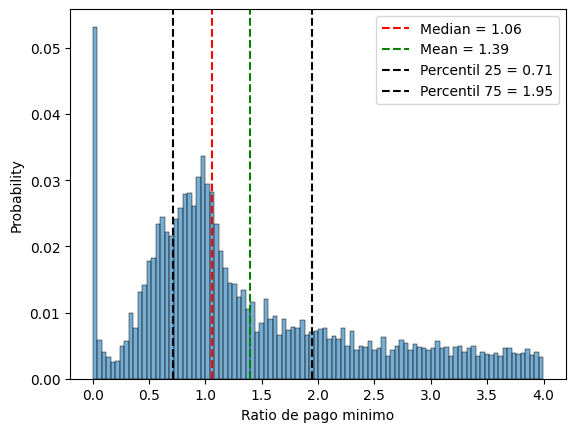

In [55]:
plt.figure()
sns.histplot(data=df_RPM, x="Rat_PM",
             bins=100,
             stat= "probability",
             alpha=0.6)
plt.xlabel("Ratio de pago minimo")
#Calculos
md=df_RPM["Rat_PM"].median()
mn=df_RPM["Rat_PM"].mean()
p25=df_RPM["Rat_PM"].quantile(0.25)
p75=df_RPM["Rat_PM"].quantile(0.75)
#Trazos
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [56]:
porcentaje = (len(df[df["Rat_PM"]>1])/len(df))*100
porcentaje

70.52513966480447

Se puede observar y ver que cerca de un 7% de clientes no han realizado ni un pago sobre el pago minimo y en total el 70% hicieron un pago menor al pago minimo,entonces se tendría que evaluar cual de estos su deuda esta por vencer y esten vencidos,para poder determinar el posible porcentaje de clientes morosos.

<Axes: xlabel='TENURE', ylabel='Rat_PM'>

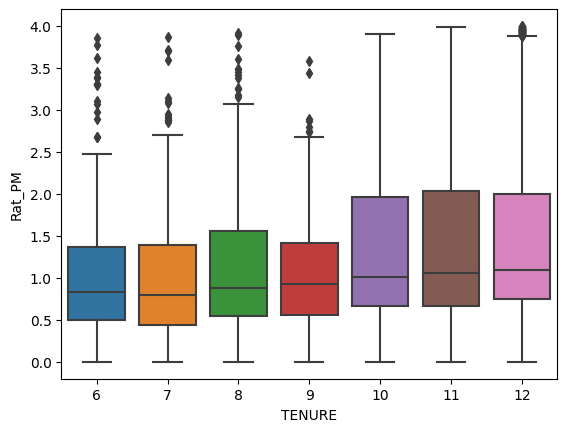

In [57]:
plt.figure()
sns.boxplot(data=df_RPM,
            x="TENURE",y="Rat_PM")

Se observa que hay una tendencia que mayor meses de uso de la TC, mayor va hacer el 50 % que pague más el pago minimo, y en general también se ve que los más experimentados suelen pagar más del pago mínimo, debido a que tienen mayor experiencia de los créditos se aseguran pagar más, ya que así se amortizan la deuda y no solamente los intereses que se genera.

#**Conclusiones Finales del EDA**

Conclusión sobre los Segmentos de Clientes de Tarjeta de Crédito:

1. Hábitos de Compra:

Los clientes muestran una preferencia por las compras a plazos, con un 36% de las compras realizadas de esta manera, en comparación con solo el 20% de compras de una sola vez.
A pesar de la preferencia por las compras a plazos, se observa que los clientes más antiguos son más propensos a comprar en cuotas.
2. Uso de Adelanto en Efectivo:

Una mayoría (60%) de los clientes evita hacer uso de adelantos en efectivo.
Aquellos con límites de crédito más altos son más propensos a utilizar adelantos en efectivo, pero también muestran un mejor comportamiento de pago, lo que indica una gestión financiera más experta.
3. Salud Financiera:

La mayoría de los clientes (98%) no agota su línea de crédito, sugiriendo que la asignación de límites de crédito está bien calibrada.
Sin embargo, un 2.5% de los clientes gasta más que su límite de crédito, lo que sugiere la necesidad de revisar y ajustar estos límites o considerar intervenciones de educación financiera.
4. Comportamiento de Pago:

Hay preocupaciones en cuanto al comportamiento de pago, ya que el 70% de los clientes no paga más que el mínimo requerido y el 7% no ha realizado ningún pago sobre el mínimo.
Los clientes con mayor tenencia muestran un comportamiento de pago más responsable, lo que sugiere que la familiaridad y experiencia con el producto llevan a mejores hábitos financieros.
5. Implicaciones y Recomendaciones:

Las campañas de marketing deberían centrarse en promocionar compras a plazos, especialmente entre clientes más nuevos. Las promociones con tiendas aliadas, como compras a 6 cuotas sin intereses, podrían incentivar más este comportamiento.
Es esencial monitorear y ofrecer educación financiera a aquellos clientes que superan regularmente su límite de crédito o que muestran un patrón de pagos insuficientes.
Los clientes con mayor tenencia, especialmente aquellos con 12 meses o más, son candidatos ideales para ofertas de productos adicionales o aumentos de línea de crédito, dada su familiaridad y buen comportamiento financiero.
Es crucial ofrecer herramientas educativas y recursos a clientes más nuevos para guiarlos hacia un uso saludable de su tarjeta de crédito.

# Preparando el modelo no supervisado K-means


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings(action="ignore")

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SALDO,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
FREC_ACT_SALDO,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
MONTO_COMPRAS,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
MONTO_COMPRA_UNA_SOLAVEZ,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
MONTO_COMPRAS_EN_CUOTAS,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
ADELANTO_EFECTIVO,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
FRECUENCIA_COMPRAS,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
FRECUENCIA_COMPRAS_UNA_SOLAVEZ,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
FRECUENCIA_COMPRAS_EN_CUOTAS,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
FRECUENCIA_ADELANTO_EFECTIVO,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


**Se observa que hay varias columnas con bastantes outliers SALDO,  MONTO_COMPRA_UNA_SOLAVEZ, MONTO_COMPRAS_EN_CUOTAS, ADELANTO_EFECTIVO entre otros que tendremos que tratar para poder aplicar el modelo de clustering, si decidimos tratar estos outlier, se va a perder mucho datos asi que no se aplicara RIQ, ni Zscore, por ello que vamos a optar por rangos.**

**Vamos agrupar las columnas que tengan aproximadamente la misma escala**

In [60]:
columns = ["SALDO","MONTO_COMPRA_UNA_SOLAVEZ","MONTO_COMPRAS","MONTO_COMPRAS_EN_CUOTAS","ADELANTO_EFECTIVO","LIMITE_CREDITO","PAGOS","PAGOS_MINIMOS"]

In [61]:
for c in columns:

  Range = c+"_Range"
  df[Range]=0
  df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
  df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
  df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
  df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
  df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
  df.loc[((df[c]>10000)),Range]=6

In [62]:
columns = ["FREC_ACT_SALDO","FRECUENCIA_COMPRAS","FRECUENCIA_COMPRAS_UNA_SOLAVEZ","FRECUENCIA_COMPRAS_EN_CUOTAS","FRECUENCIA_ADELANTO_EFECTIVO","PRC_FULL_PAYMENT","Uso_Credito","Rat_Compra_Cuota","Rat_PM"]

In [63]:
for c in columns:

    Range=c+"_Range"
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)),Range]=10


In [64]:
columns= ["TRX_ADELANTO_EFECTIVO","TRX_COMPRAS"]

In [65]:
for c in columns:
    Range= c+"_Range"
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   ID_TITULAR                            8950 non-null   object  
 1   SALDO                                 8950 non-null   float64 
 2   FREC_ACT_SALDO                        8950 non-null   float64 
 3   MONTO_COMPRAS                         8950 non-null   float64 
 4   MONTO_COMPRA_UNA_SOLAVEZ              8950 non-null   float64 
 5   MONTO_COMPRAS_EN_CUOTAS               8950 non-null   float64 
 6   ADELANTO_EFECTIVO                     8950 non-null   float64 
 7   FRECUENCIA_COMPRAS                    8950 non-null   float64 
 8   FRECUENCIA_COMPRAS_UNA_SOLAVEZ        8950 non-null   float64 
 9   FRECUENCIA_COMPRAS_EN_CUOTAS          8950 non-null   float64 
 10  FRECUENCIA_ADELANTO_EFECTIVO          8950 non-null   float64 
 11  TRX_

In [68]:
df.head()

,ID_TITULAR,SALDO,FREC_ACT_SALDO,MONTO_COMPRAS,MONTO_COMPRA_UNA_SOLAVEZ,MONTO_COMPRAS_EN_CUOTAS,ADELANTO_EFECTIVO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_UNA_SOLAVEZ,FRECUENCIA_COMPRAS_EN_CUOTAS,FRECUENCIA_ADELANTO_EFECTIVO,TRX_ADELANTO_EFECTIVO,TRX_COMPRAS,LIMITE_CREDITO,PAGOS,PAGOS_MINIMOS,PRC_FULL_PAYMENT,TENURE,Categoria_Adelanto,PRC_Cat,Uso_Credito,Rat_Compra_Cuota,Rat_PM,SALDO_Range,MONTO_COMPRA_UNA_SOLAVEZ_Range,MONTO_COMPRAS_Range,MONTO_COMPRAS_EN_CUOTAS_Range,ADELANTO_EFECTIVO_Range,LIMITE_CREDITO_Range,PAGOS_Range,PAGOS_MINIMOS_Range,FREC_ACT_SALDO_Range,FRECUENCIA_COMPRAS_Range,FRECUENCIA_COMPRAS_UNA_SOLAVEZ_Range,FRECUENCIA_COMPRAS_EN_CUOTAS_Range,FRECUENCIA_ADELANTO_EFECTIVO_Range,PRC_FULL_PAYMENT_Range,Uso_Credito_Range,Rat_Compra_Cuota_Range,Rat_PM_Range,TRX_ADELANTO_EFECTIVO_Range,TRX_COMPRAS_Range
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Baja,Baja,0.040901,1.0,1.446508,1,0,1,1,0,2,1,1,9,2,0,1,0,0,1,10,10,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Baja,Baja,0.457495,0.0,3.826241,4,0,0,0,5,5,4,3,10,0,0,0,3,3,5,0,10,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Baja,Baja,0.332687,0.0,0.991682,3,2,2,0,0,5,2,2,10,10,10,0,0,0,4,0,10,0,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,Baja,Baja,0.222223,0.0,0.000000,3,3,3,0,1,5,0,1,7,1,1,0,1,0,3,0,0,1,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Baja,Baja,0.681429,0.0,2.771075,2,1,1,0,0,3,2,1,10,1,1,0,0,0,7,0,10,0,1


In [69]:
df.drop(["ID_TITULAR","SALDO","FREC_ACT_SALDO","MONTO_COMPRAS","MONTO_COMPRAS_EN_CUOTAS","ADELANTO_EFECTIVO","FRECUENCIA_COMPRAS","FRECUENCIA_COMPRAS_UNA_SOLAVEZ",
         "FRECUENCIA_COMPRAS_EN_CUOTAS","FRECUENCIA_ADELANTO_EFECTIVO","TRX_ADELANTO_EFECTIVO","TRX_COMPRAS","LIMITE_CREDITO","PAGOS","PAGOS_MINIMOS","PRC_FULL_PAYMENT",
         "Categoria_Adelanto","PRC_Cat","Uso_Credito","Rat_Compra_Cuota","Rat_PM","MONTO_COMPRA_UNA_SOLAVEZ"],inplace = True,axis=1)
X = np.asarray(df)

**NORMALIZAMOS**

In [70]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 20)

#**Modelamiento**

**Clustering con Kmeans**

In [71]:

n_clusters=30 #Definimos el numero máximo de cluster que se quiere probar
inercia=[] #creamos una lista vacia que se almacenara la inercia
# Creamos un bucle que itere
for i in range(1,n_clusters):
  kmean=KMeans(i)
  kmean.fit(X)
  inercia.append(kmean.inertia_)

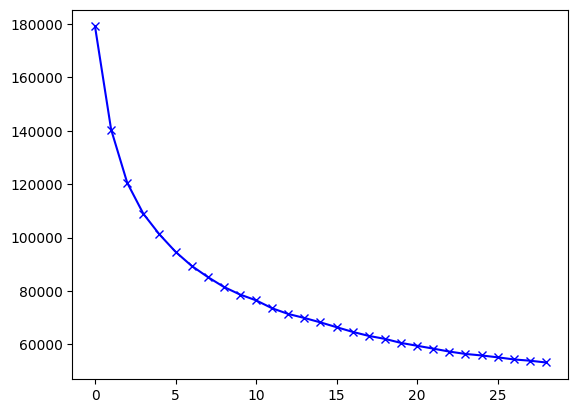

In [72]:
plt.plot(inercia,"bx-")

Aplicando el método del codo vemos que caería en el 7

In [73]:
#Aplicamos con 7
kmean = KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [74]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,SALDO_Range,MONTO_COMPRA_UNA_SOLAVEZ_Range,MONTO_COMPRAS_Range,MONTO_COMPRAS_EN_CUOTAS_Range,ADELANTO_EFECTIVO_Range,LIMITE_CREDITO_Range,PAGOS_Range,PAGOS_MINIMOS_Range,FREC_ACT_SALDO_Range,FRECUENCIA_COMPRAS_Range,FRECUENCIA_COMPRAS_UNA_SOLAVEZ_Range,FRECUENCIA_COMPRAS_EN_CUOTAS_Range,FRECUENCIA_ADELANTO_EFECTIVO_Range,PRC_FULL_PAYMENT_Range,Uso_Credito_Range,Rat_Compra_Cuota_Range,Rat_PM_Range,TRX_ADELANTO_EFECTIVO_Range,TRX_COMPRAS_Range,cluster
0,12,1,0,1,1,0,2,1,1,9,2,0,1,0,0,1,10,10,0,1,2
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,5,0,10,1,0,0
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,4,0,10,0,3,3
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,3,0,0,1,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,7,0,10,0,1,4


Interpretación de los grupos

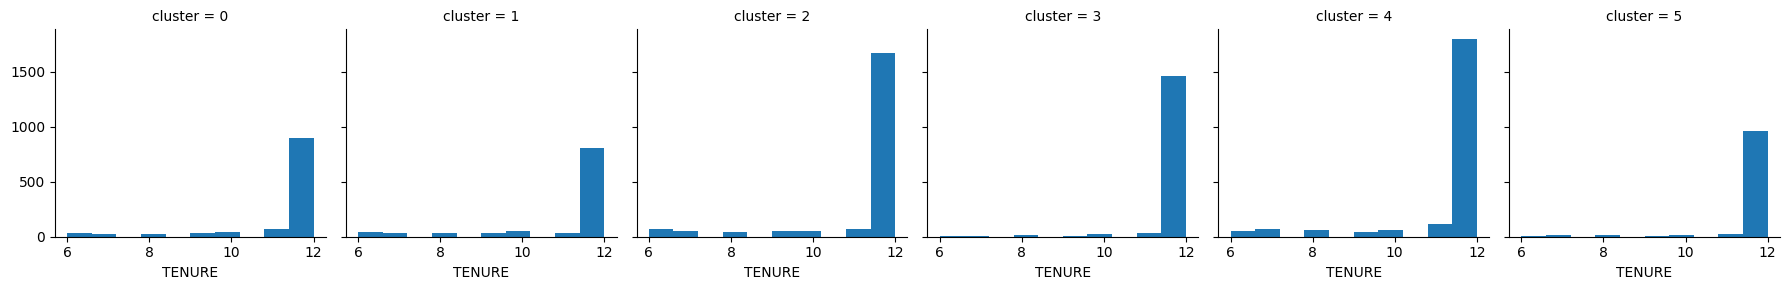

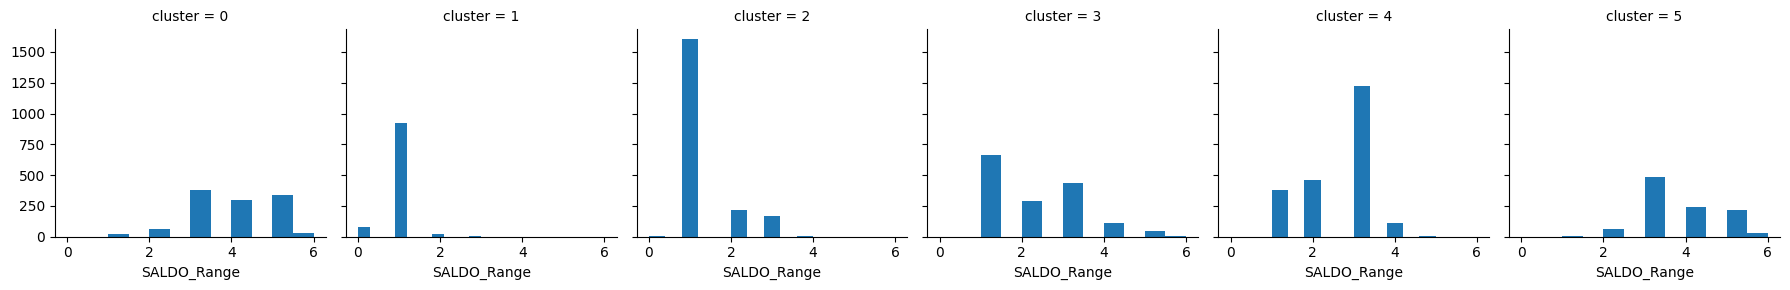

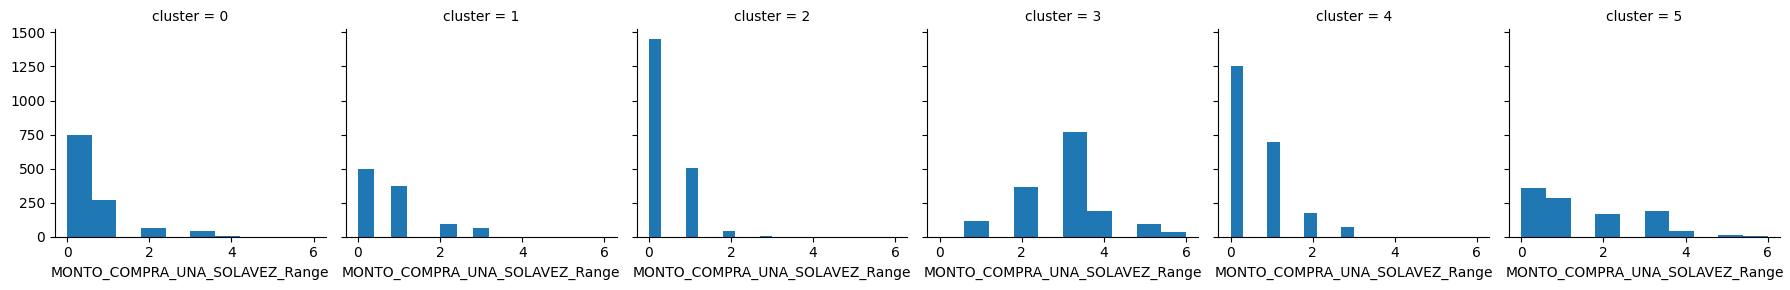

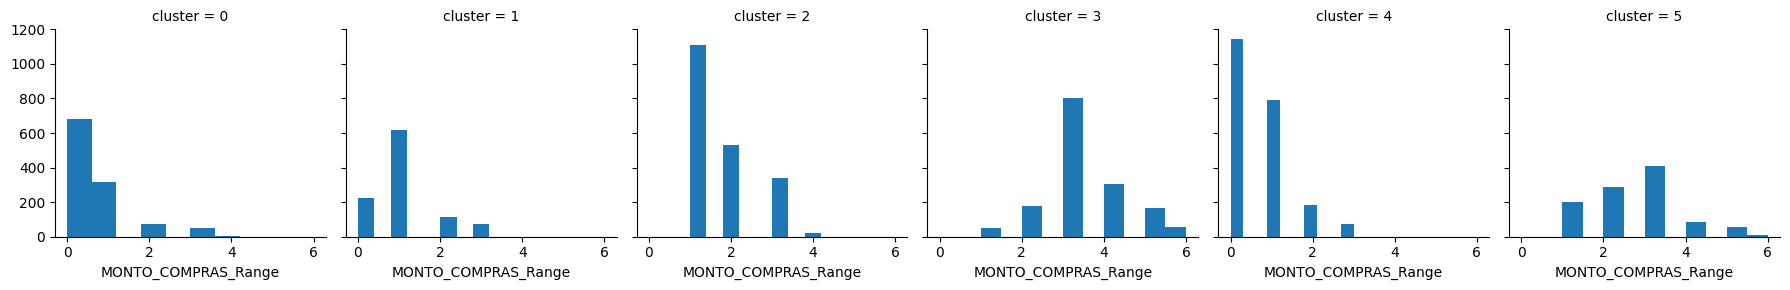

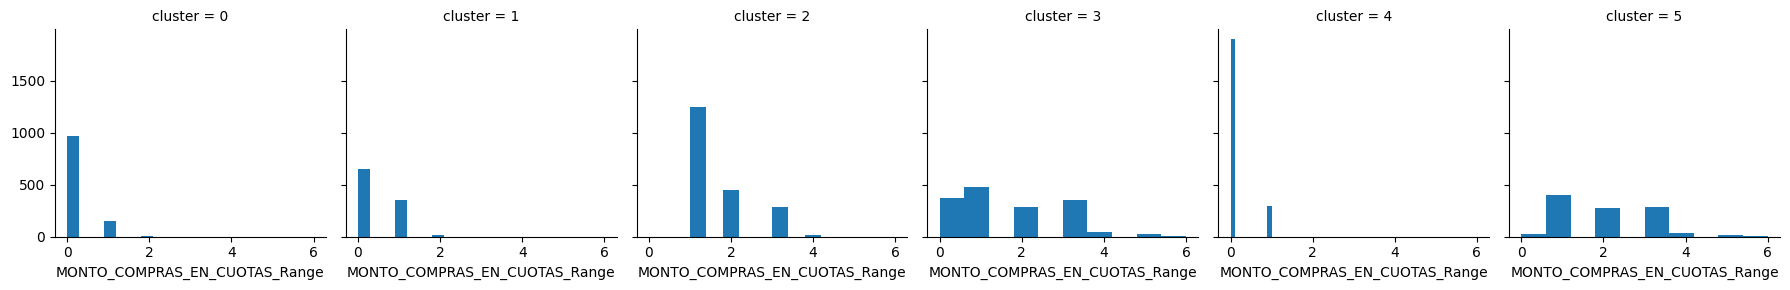

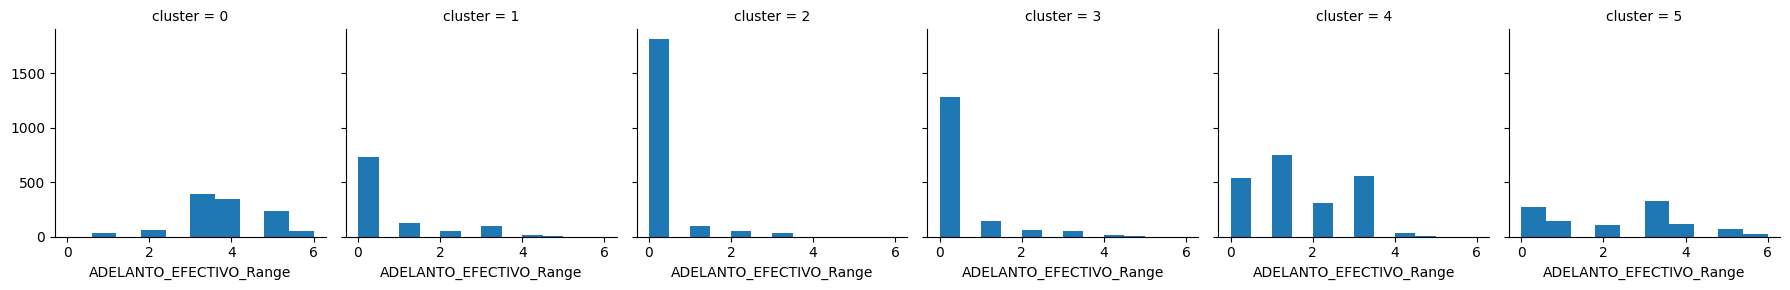

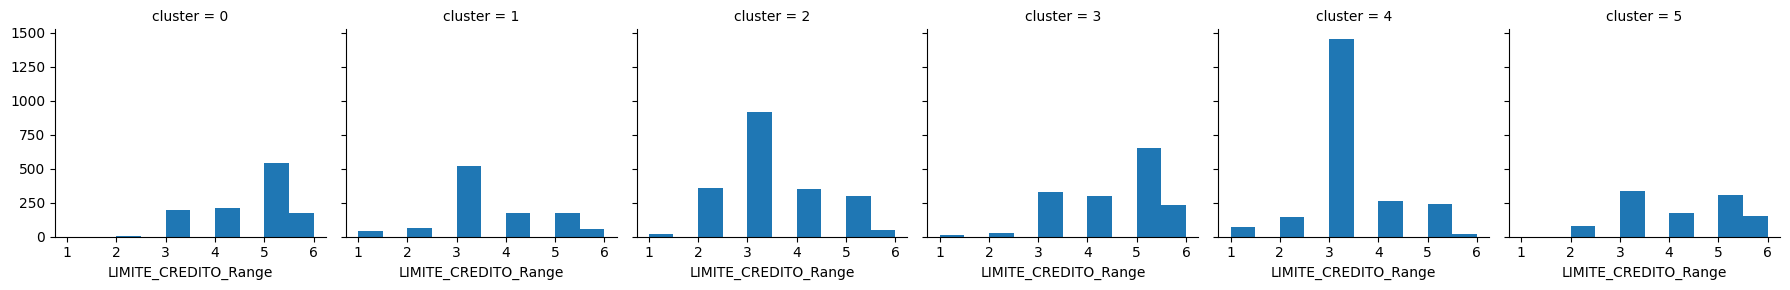

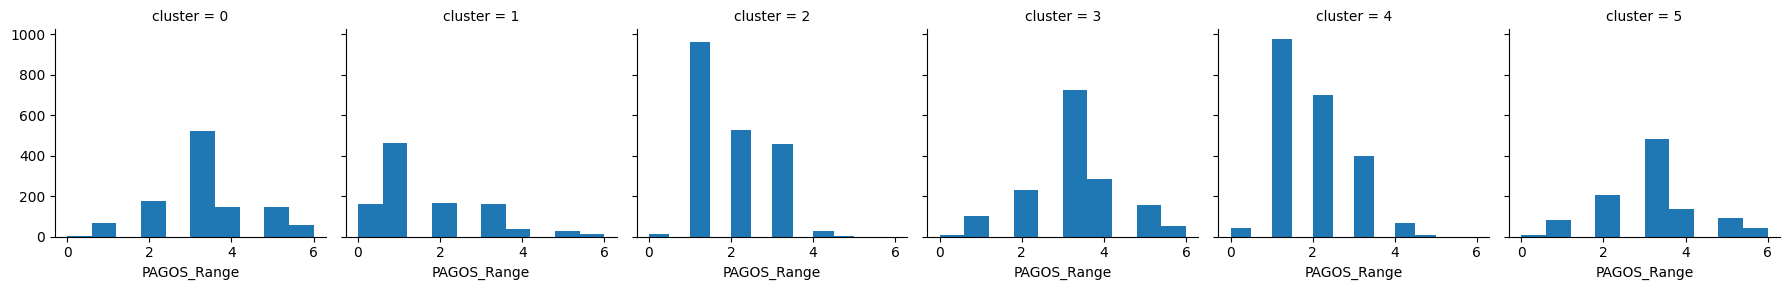

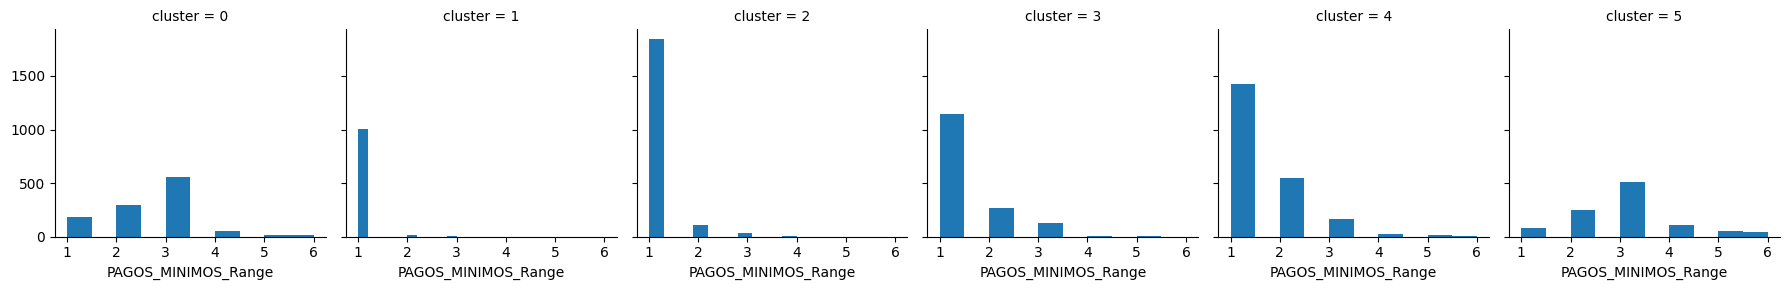

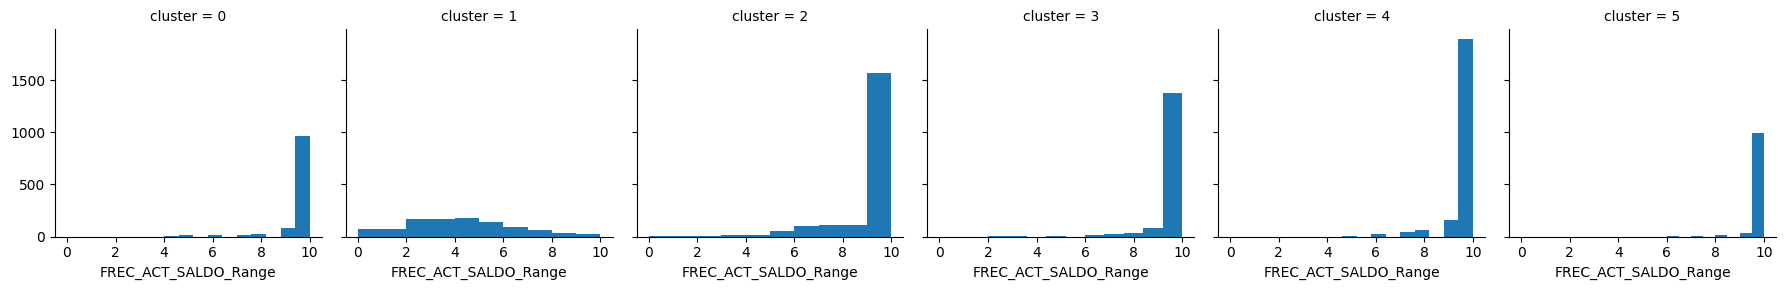

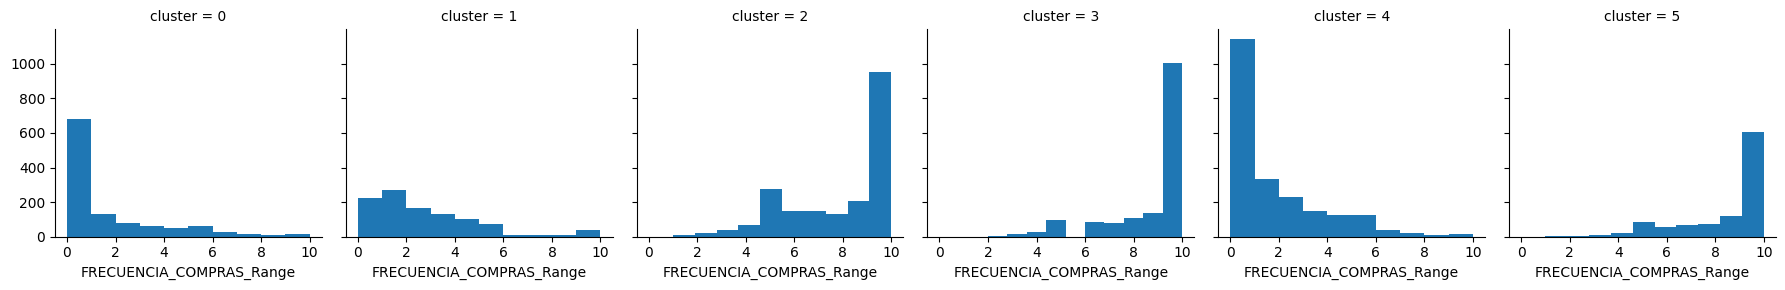

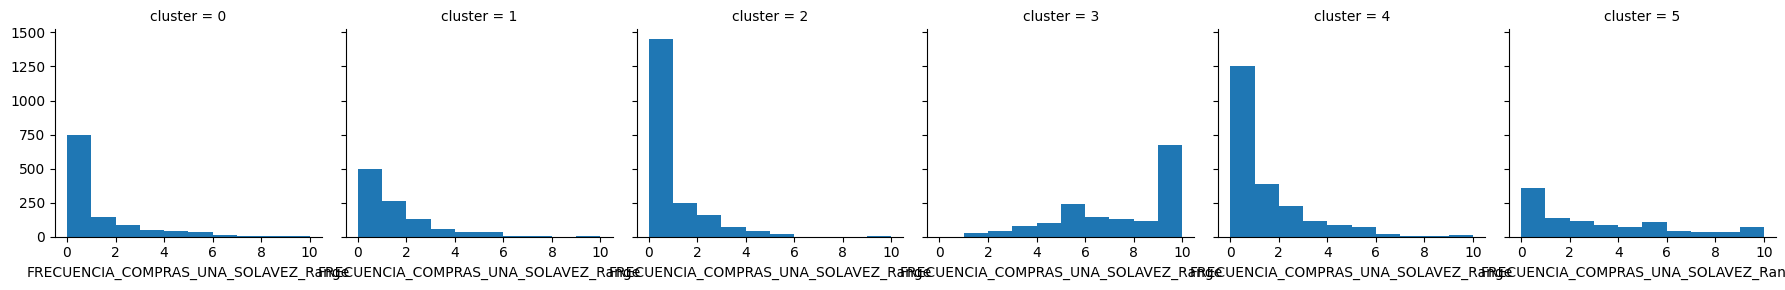

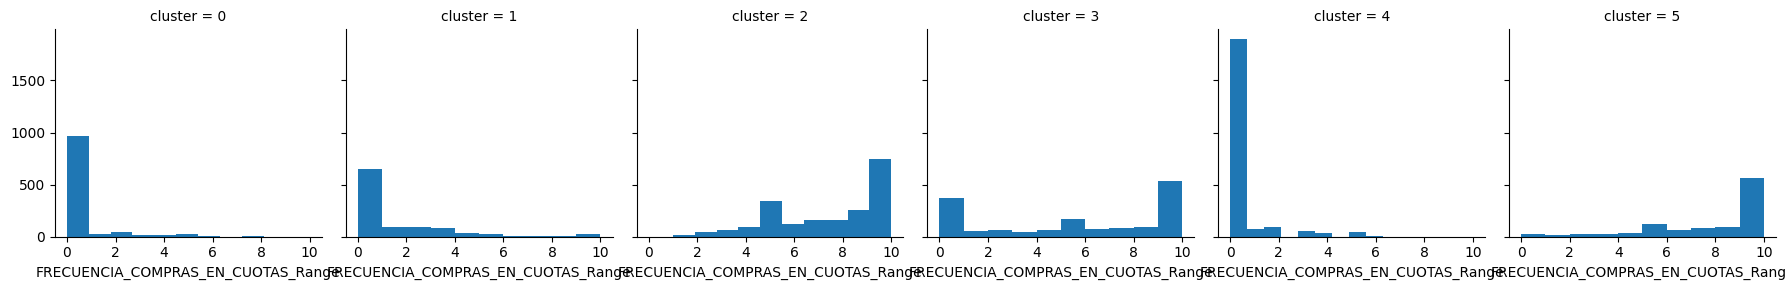

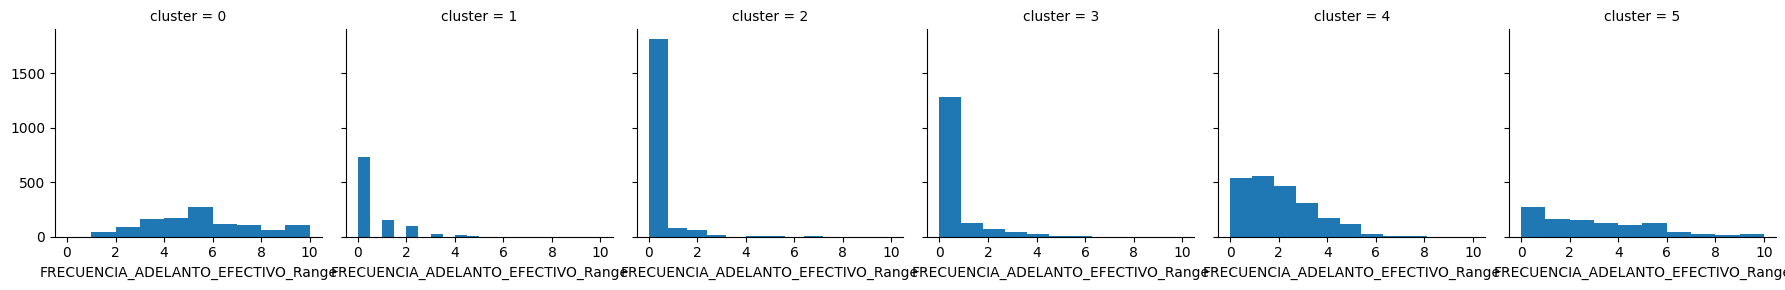

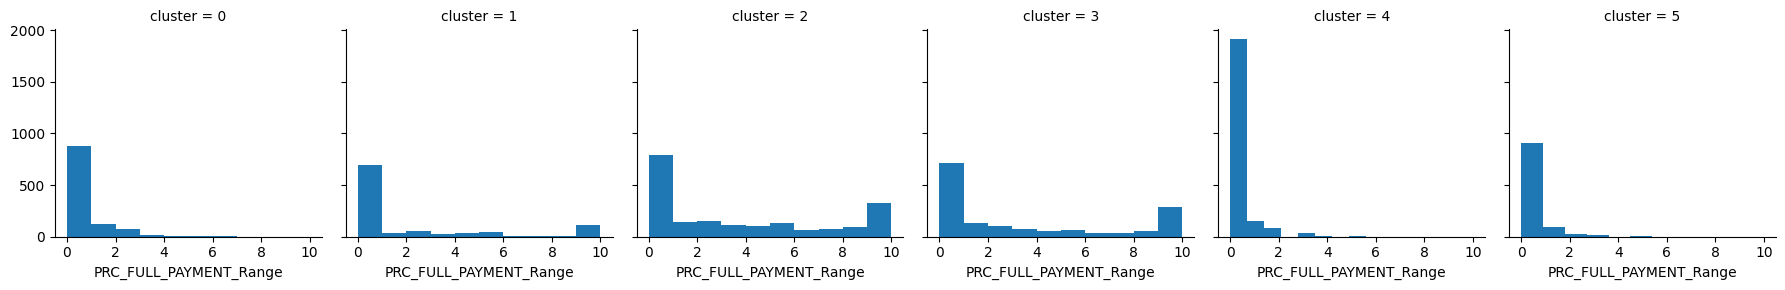

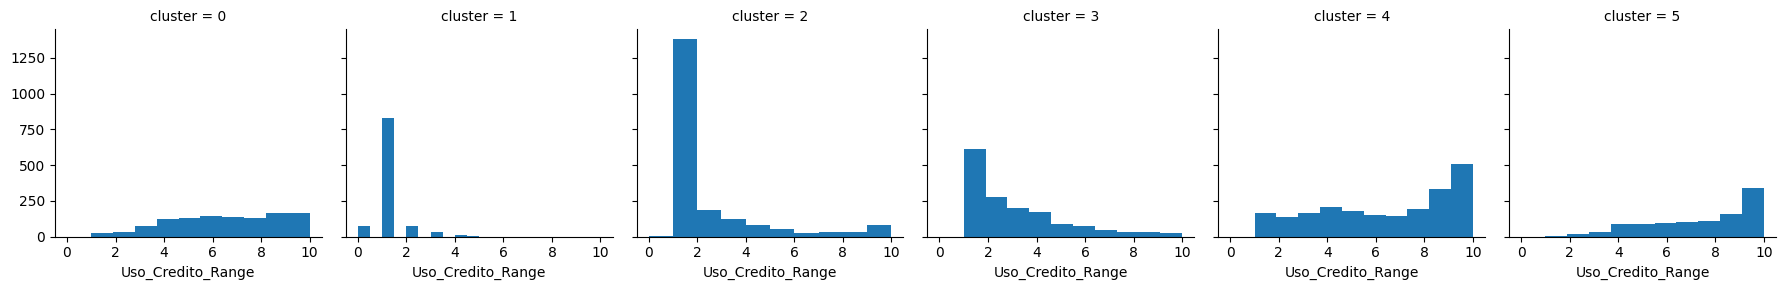

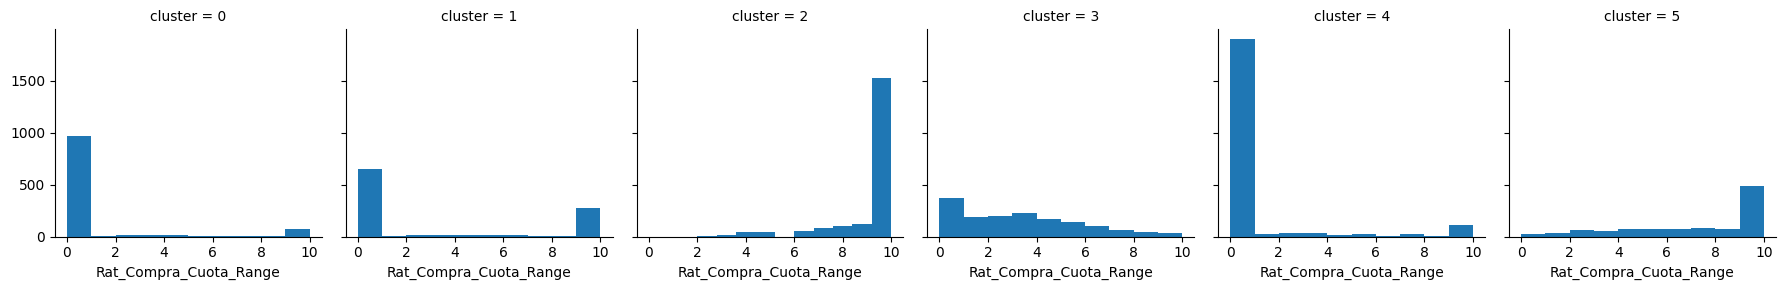

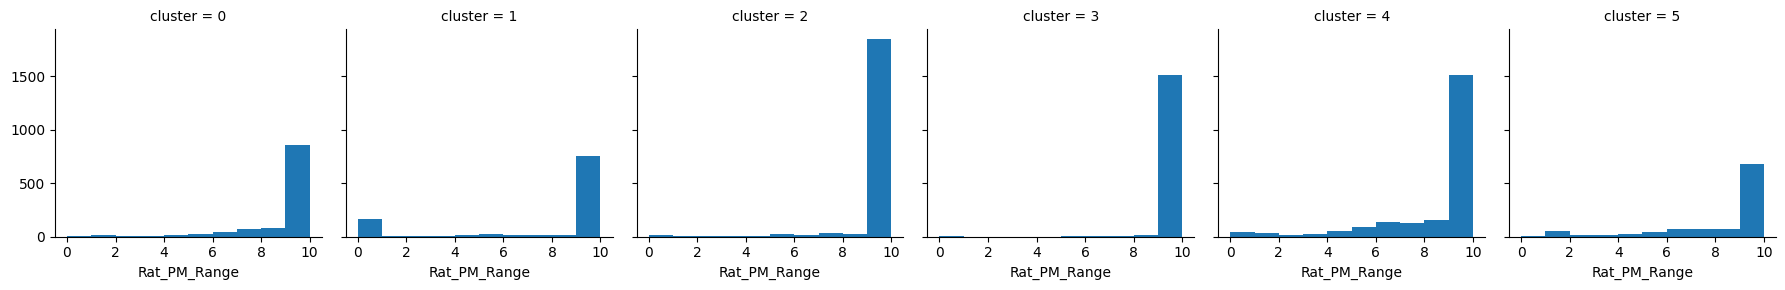

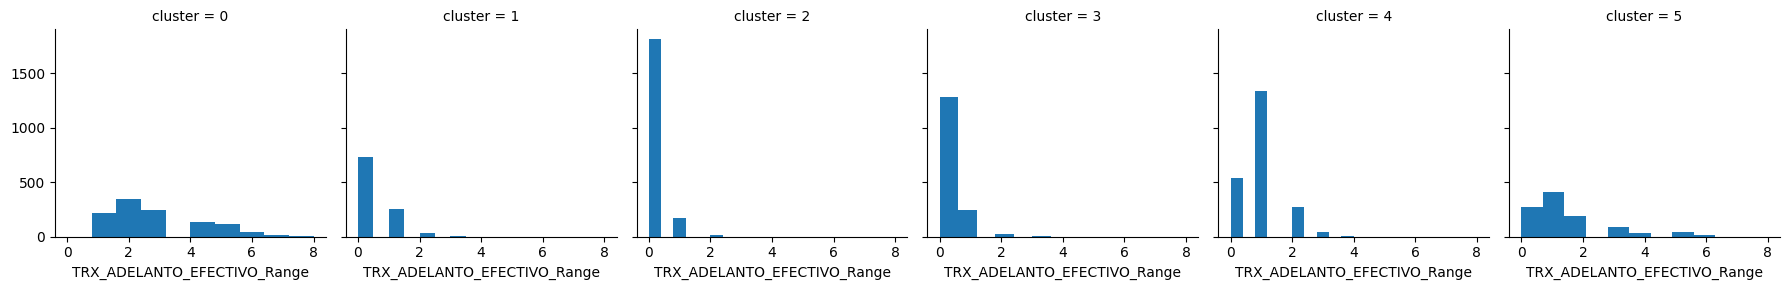

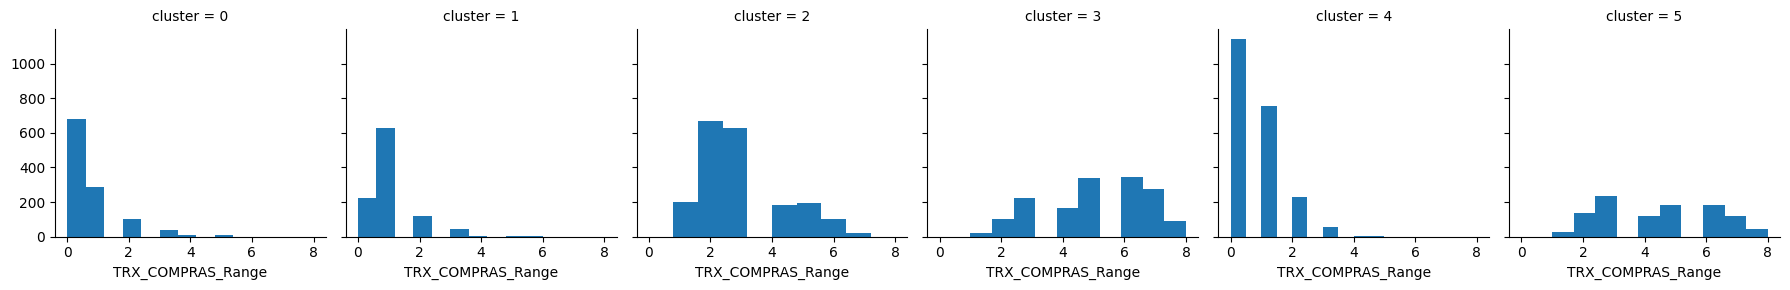

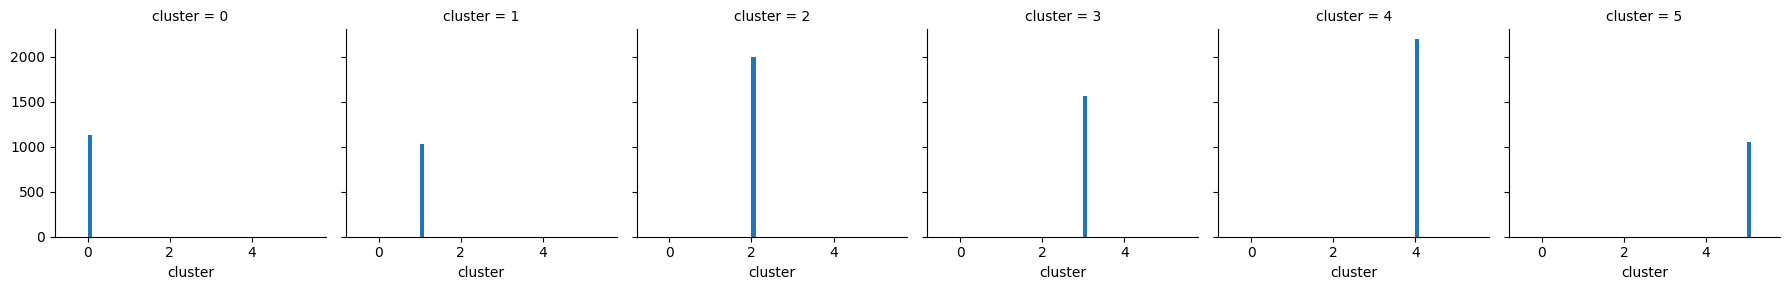

In [75]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Cluster 0: 'Crédito medio-alto, comprador habitual, compras variadas.'

Cluster 1: 'Crédito medio-alto, prefieren cuotas, ocasional adelanto de efectivo.'

Cluster 2: 'Crédito alto, comprador frecuente, ocasional adelanto de efectivo.'

Cluster 3: 'Crédito medio, compra poco, frecuente adelanto de efectivo.'

Cluster 4: 'Crédito alto, pocas compras costosas, no usa cuotas, adelanta efectivo regularmente.'

Cluster 5: 'Crédito medio-alto, compras frecuentes no costosas, sin adelantos.'

In [76]:
# Se utiliza la similitud de coseno para ver si dos vectores son similares o no, si es cercano a 0 son disímiles si es cercano 1 muy similares.
dist = 1 - cosine_similarity(X)
#Reducimos la dimensionalidad a 2 componentes principales
pca = PCA(2)
#Ajustamos nuestra PCA a nuestra matriz de distancia
pca.fit(dist)
#Transformamos la distancia a dos componentes principales
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

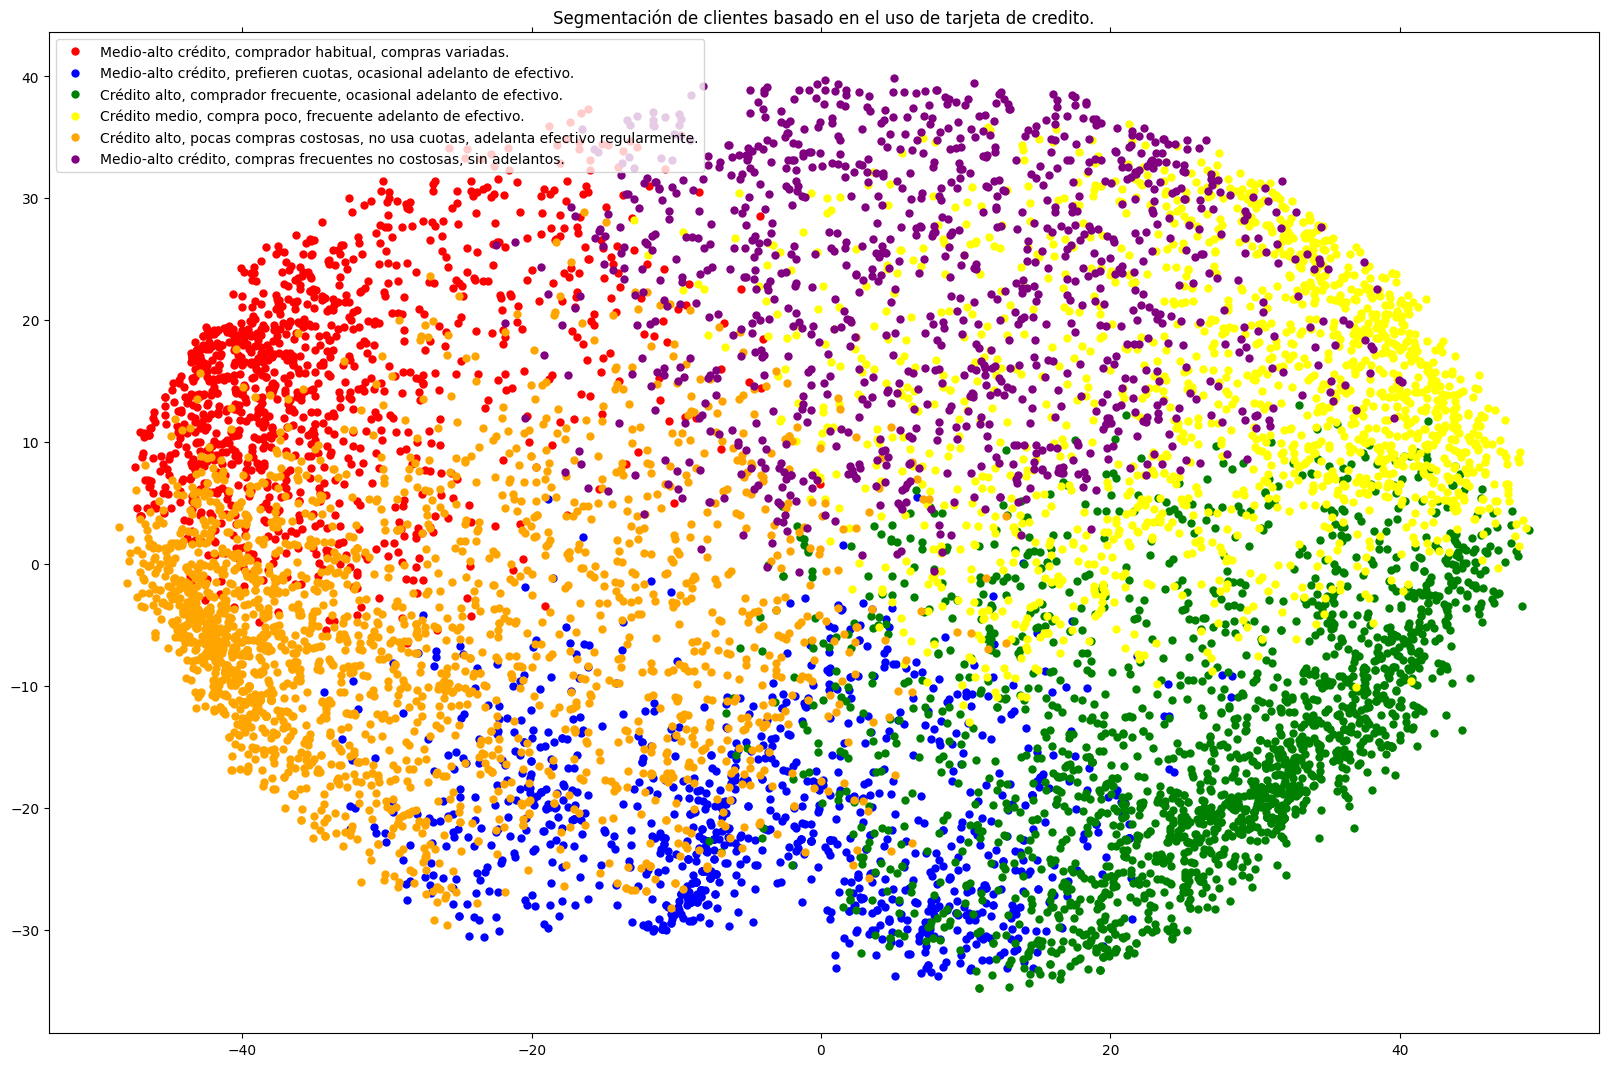

In [77]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'yellow',
          4: 'orange',
          5:'purple'}

names = {0: 'Medio-alto crédito, comprador habitual, compras variadas.',
1: 'Medio-alto crédito, prefieren cuotas, ocasional adelanto de efectivo.',
2: 'Crédito alto, comprador frecuente, ocasional adelanto de efectivo.',
3: 'Crédito medio, compra poco, frecuente adelanto de efectivo.',
4: 'Crédito alto, pocas compras costosas, no usa cuotas, adelanta efectivo regularmente.',
5: 'Medio-alto crédito, compras frecuentes no costosas, sin adelantos.'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Segmentación de clientes basado en el uso de tarjeta de credito.")
plt.show()